<a href="https://colab.research.google.com/github/zompazompa1957/Machine-Learning-with-Python/blob/master/Copia_di_PyCaret_2_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

In [ ]:
from pycaret.utils import version
version()

'2.3.5'

# 🤖 New Models: DummyClassifier and DummyRegressor

## Classification

In [ ]:
# load dataset
from pycaret.datasets import get_data
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [ ]:
# init setup
from pycaret.classification import *
s = setup(data, target = 'Purchase', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# model training and selection
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8341,0.0000,0.7594,0.8024,0.7780,0.6460,0.6491,0.014
lr,Logistic Regression,0.8328,0.8922,0.7382,0.8105,0.7711,0.6400,0.6432,0.394
lda,Linear Discriminant Analysis,0.8328,0.8921,0.7664,0.7951,0.7782,0.6443,0.6470,0.015
gbc,Gradient Boosting Classifier,0.8155,0.8873,0.7555,0.7648,0.7581,0.6091,0.6113,0.128
ada,Ada Boost Classifier,0.8154,0.8847,0.7278,0.7808,0.7517,0.6052,0.6078,0.114
lightgbm,Light Gradient Boosting Machine,0.7941,0.8758,0.7278,0.7353,0.7308,0.5641,0.5649,0.098
rf,Random Forest Classifier,0.7887,0.8687,0.7171,0.7287,0.7204,0.5509,0.5534,0.514
et,Extra Trees Classifier,0.7713,0.8357,0.7032,0.7028,0.7002,0.5159,0.5184,0.465
nb,Naive Bayes,0.7700,0.8420,0.7836,0.6750,0.7229,0.5285,0.5357,0.015
dt,Decision Tree Classifier,0.7473,0.7401,0.6683,0.6726,0.6687,0.4646,0.4663,0.016


## Regression

In [ ]:
# load dataset
from pycaret.datasets import get_data
data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# init setup
from pycaret.regression import *
s = setup(data, target = 'medv', session_id = 123)

,Description,Value
0,session_id,123
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


In [ ]:
# model training and selection
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0322,9.208200e+00,2.8932,8.912000e-01,0.1291,0.1001,0.452
gbr,Gradient Boosting Regressor,2.1344,9.274500e+00,2.9774,8.833000e-01,0.1441,0.1107,0.096
rf,Random Forest Regressor,2.2293,1.059670e+01,3.1446,8.677000e-01,0.1447,0.1131,0.509
lightgbm,Light Gradient Boosting Machine,2.3108,1.142670e+01,3.2673,8.592000e-01,0.1481,0.1155,0.043
ada,AdaBoost Regressor,2.8158,1.572470e+01,3.8118,8.093000e-01,0.1795,0.1493,0.097
ridge,Ridge Regression,3.2905,2.271180e+01,4.6482,7.290000e-01,0.2421,0.1663,0.015
br,Bayesian Ridge,3.2838,2.289260e+01,4.6529,7.288000e-01,0.2397,0.1654,0.016
lr,Linear Regression,3.3139,2.269370e+01,4.6540,7.272000e-01,0.2462,0.1668,0.014
dt,Decision Tree Regressor,2.9604,2.073070e+01,4.3029,7.209000e-01,0.1969,0.1497,0.015
lasso,Lasso Regression,3.6476,2.752740e+01,5.0826,6.755000e-01,0.2576,0.1747,0.015


In [ ]:
dummy = create_model('dummy', strategy = 'quantile', quantile = 0.5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.4083,126.5197,11.2481,-0.4156,0.3890,0.2867
1,5.0889,47.1617,6.8674,-0.0184,0.3297,0.3002
2,7.5111,100.2892,10.0144,-0.0013,0.4570,0.4650
3,7.5333,101.5294,10.0762,-0.0012,0.4685,0.4734
4,7.5457,120.6409,10.9837,-0.0234,0.4667,0.4289
5,4.7857,53.7546,7.3318,-0.0000,0.3428,0.2928
6,5.7457,69.6066,8.3431,-0.0318,0.3334,0.2707
7,7.1457,111.7534,10.5713,-0.0255,0.3716,0.2943
8,5.9200,55.9971,7.4831,-0.0015,0.3885,0.3774
9,6.5486,89.9577,9.4846,-0.0409,0.3354,0.2634


# 📈 Custom Probability Cut-off

In [ ]:
# load dataset
from pycaret.datasets import get_data
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [ ]:
# init setup
from pycaret.classification import *
s = setup(data, target = 'Purchase', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
lr = create_model('lr')
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9445,0.7241,0.9130,0.8077,0.7077,0.7189
1,0.8533,0.9018,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9160,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8267,0.9108,0.7241,0.8077,0.7636,0.6274,0.6298
4,0.8400,0.9303,0.7241,0.8400,0.7778,0.6538,0.6582
5,0.8933,0.9280,0.8276,0.8889,0.8571,0.7722,0.7735
6,0.7600,0.8051,0.6207,0.7200,0.6667,0.4808,0.4840
7,0.8133,0.8575,0.7500,0.7500,0.7500,0.6011,0.6011
8,0.7838,0.8618,0.6786,0.7308,0.7037,0.5339,0.5348
9,0.7838,0.8665,0.6429,0.7500,0.6923,0.5272,0.5309


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
lr_30 = create_model('lr', probability_threshold=0.3)
print(lr_30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9445,0.8276,0.8276,0.8276,0.7189,0.7189
1,0.7867,0.9018,0.9310,0.6585,0.7714,0.5822,0.6131
2,0.8133,0.9160,0.8966,0.7027,0.7879,0.6255,0.6404
3,0.7733,0.9108,0.9310,0.6429,0.7606,0.5587,0.5935
4,0.7733,0.9303,0.9310,0.6429,0.7606,0.5587,0.5935
5,0.8000,0.9280,0.8966,0.6842,0.7761,0.6012,0.6192
6,0.7333,0.8051,0.8276,0.6154,0.7059,0.4715,0.4888
7,0.7733,0.8575,0.9286,0.6341,0.7536,0.5571,0.5921
8,0.7162,0.8618,0.8214,0.5897,0.6866,0.4398,0.4601
9,0.7973,0.8665,0.8929,0.6757,0.7692,0.5946,0.6130


CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=123,
                          

In [ ]:
recalls = []

for i in np.arange(0,1,0.1):
  model = create_model('lr', probability_threshold = i, verbose=False)
  recalls.append(pull()['Recall']['Mean'])

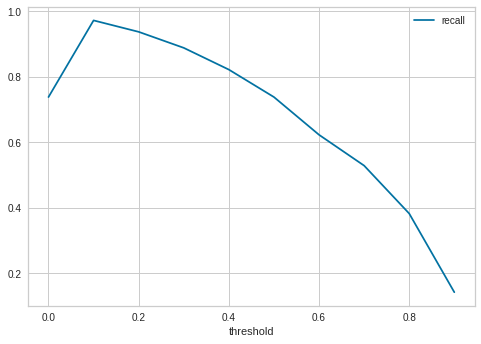

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['threshold'], df['recall'] = np.arange(0,1,0.1), recalls
df.set_index('threshold').plot()

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

def f(x):
  create_model('lr', probability_threshold = x, verbose = False)
  return pull()

interact(f, x=widgets.FloatSlider(min = 0.01, max = 1.0, step = 0.01, value = 0.5)); 

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, min=0.01, step=0.01), Output()), _dom_c…